## Imports

In [ ]:
# Data manipulation
import time
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# KERAS
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Fine-Tune your Neural Network and Save it

**Goals of this challenge**

1. **Fine-tune the optimizer** of a Neural Network
2. **Save**/**Load** a trained Neural Network

 Now that you have solid foundations about what Neural Networks are, how to design their architecture, and how to prevent them from overfitting, let's take a closer look at the `.compile(loss = ?, metrics = ?, activation = ?)` part.

## (0) The Boston Housing Dataset

We are going to use the **Boston Housing Dataset**.

Our mission is to **predict the values of the houses in USD (thousands)**, and we will measure the performance of our models using the _Mean Absolute Error (MAE)_ metric.

### (0.1) Loading the Dataset

In [ ]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick Glance at the Target

<AxesSubplot:ylabel='Count'>

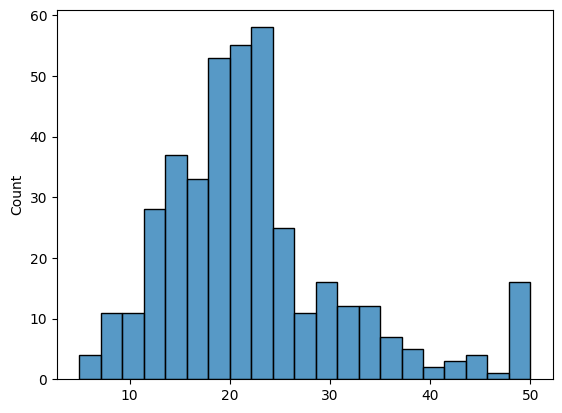

In [ ]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [ ]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [ ]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal Data Preprocessing

Here, we don't have any duplicates or missing values. Let's do the bare minimum of data preprocessing, i.e. ***scaling**, and move on quickly to the modeling phase.

#### Scaling your Features

Standardize `X_train` and `X_test`.

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (0.4) Baseline Model

 In a regression task, the baseline model **always predicts the average value of `y_train`**




#### Question: what would be the performance of the baseline model here?

Establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if we cannot beat this benchmark score on the testing set (other than showing off)?

Compute the Mean Absolute Error on the testing set using a "dumb" prediction of the mean value of `y_train`, computed on the training set.

In [ ]:
y_pred = np.mean(y_train)
print(f'The mean prediction is {y_pred:.3f}')

absolute_error_test_baseline = [np.abs(y_true - y_pred) for y_true in y_test]
mean_absolute_error_test_baseline = np.mean(absolute_error_test_baseline)

print(f'The benchmark mean absolute error is {mean_absolute_error_test_baseline:.3f}')

The mean prediction is 22.395
The benchmark mean absolute error is 6.533


## (1) The Neural Network

### Initializing a Neural Network with a Specific Architecture

Write a function called `initialize_model` that generates a Neural Network with 3 layers:
- Input layer: **10 neurons**, `relu` activation function, and the appropriate input dimension
- Hidden layer: **7 neurons** and the `relu` activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [ ]:
def initialize_model():   
    model = models.Sequential()

    model.add(layers.Dense(10, activation='relu', input_dim = X_train.shape[-1])) # highly recommend this option
    model.add(layers.Dense(7, activation='relu'))                                 # instead of input_dim = 13
    model.add(layers.Dense(1, activation='linear'))

    return model

#### Number of Parameters

How many parameters do we have in this model? 
1. Compute this number yourself
2. Double-check your answer with `model.summary()`



In [ ]:
model = initialize_model()
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


2023-02-17 11:31:14.730856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-17 11:31:14.730960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## (2) The Optimizer

### Compiling Method

Write a function that:
1. takes _both_ a **model** and an **optimizer** as arguments
2. **compiles** the model
3. returns the compiled model

Please select wisely:
- the **Loss Function** to be optimized
- the **metrics** on which the model should be evaluated

In [ ]:
def compile_model(model, optimizer_name):
    model.compile(
        loss = 'mse',
        optimizer = optimizer_name,
        metrics = ['mae']
    )

    return model

### Evaluating the Model

- Initialize the model and compile it with the `adam` optimizer
- Fit it on the training data
- Evaluate your model on the testing data

Don't forget to use an Early Stopping criterion to avoid overfitting!



In [ ]:
model = compile_model(initialize_model(), 'adam')

es = EarlyStopping(
    patience =10,
    restore_best_weights = True
)

history = model.fit(
    X_train_scaled, 
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size = 16, 
    epochs = 1000, 
    callbacks = [es], 
    verbose=0
)

res = model.evaluate(X_test_scaled, y_test)[1]
res

2023-02-17 11:31:15.071824: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 11:31:15.375014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:31:15.754242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 18.3110 - mae: 2.8838


2.8838112354278564

### Neural Network vs. Baseline

Compare the MAE on the testing set between this Neural Network and the baseline model.

In [ ]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 2.8838 for the Neural Network vs. 6.5330 for the baseline


### (2.1) Which Optimizer is the Best? 

#### Trying Different Optimizers

Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer:
-  Plot the history of the loss (MSE) and the metric (MAE)
    -  We coded two functions: `plot_loss_mae` and `plot_loss_mse`. Which one should you use? Feel free to use it.
-  Report the corresponding Mean Absolute Error
-  Compute the time your Neural Net needed to fit the training set



In [ ]:
def plot_loss_mae(history):
    # Setting figures
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

    # Create the plots
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])

    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])

    # Set titles and labels
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')

    # Set limits for y-axes
    ax1.set_ylim(ymin=0, ymax=200)
    ax2.set_ylim(ymin=0, ymax=20)

    # Generate legends
    ax1.legend(['Train', 'Validation'], loc='best')
    ax2.legend(['Train', 'Validation'], loc='best')

    # Show grids
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)

    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)

    plt.show() 

In [ ]:
def plot_loss_mse(history):
    # Setting figures
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

    # Create the plots
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])

    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])

    # Set titles and labels
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')

    # Set limits for y-axes
    ax1.set_ylim(ymin=0, ymax=20)
    ax2.set_ylim(ymin=0, ymax=200)

    # Generate legends
    ax1.legend(['Train', 'Validation'], loc='best')
    ax2.legend(['Train', 'Validation'], loc='best')

    # Show grids
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)

    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)

    plt.show()

2023-02-17 11:31:39.912131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:31:40.327469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 18.1775 - mae: 2.9994
MAE with the rmsprop optimizer: 2.9994  reached in 38 s after 262 epochs


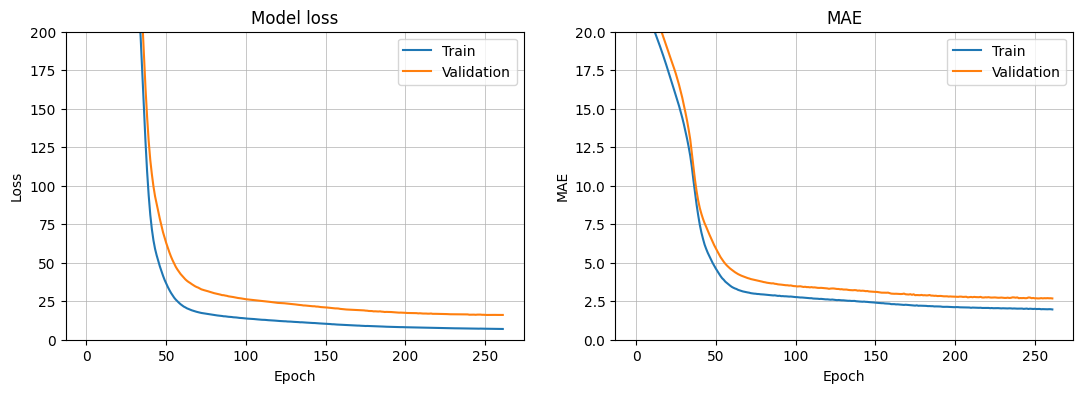

2023-02-17 11:32:18.009942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:32:18.304966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 9ms/step - loss: 21.4250 - mae: 3.1055
MAE with the adam optimizer: 3.1055  reached in 26 s after 212 epochs


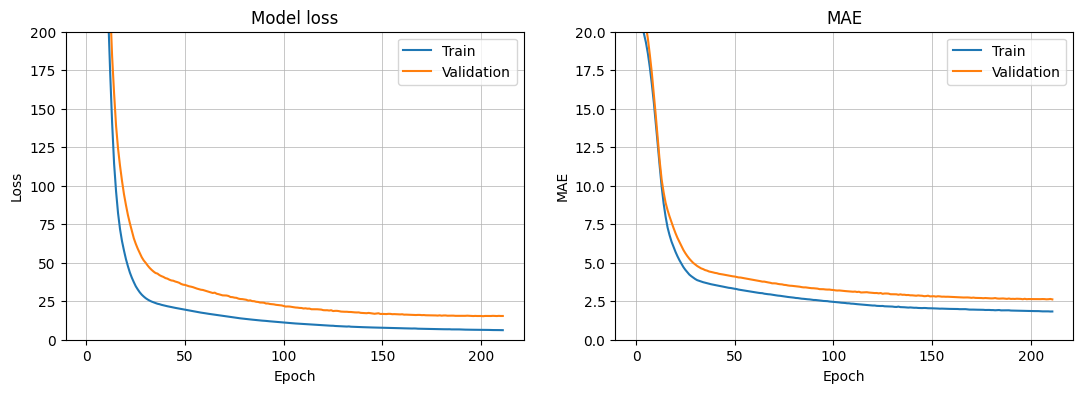

2023-02-17 11:32:44.110927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:32:44.379306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 9ms/step - loss: 481.9387 - mae: 20.2748
MAE with the adagrad optimizer: 20.2748  reached in 55 s after 500 epochs


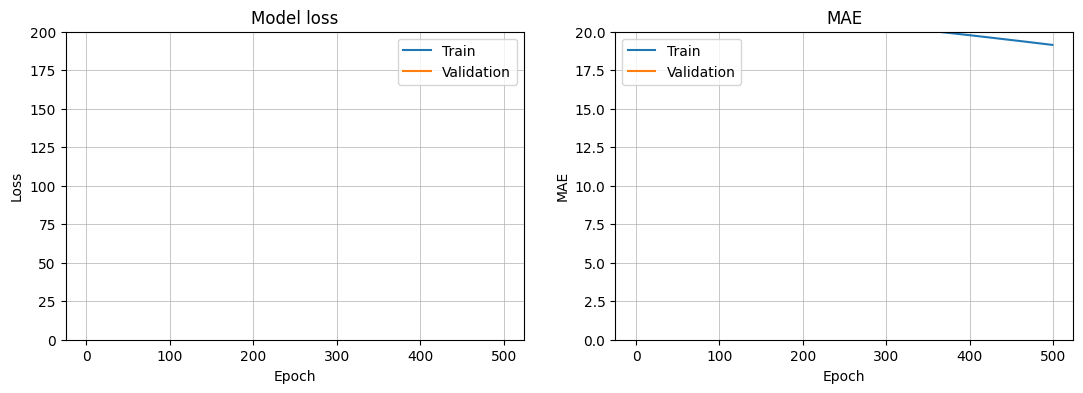

In [ ]:
results = []

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()

    model = compile_model(initialize_model(), optimizer)

    es = EarlyStopping(patience = 10, restore_best_weights = True)

    history = model.fit(
        X_train_scaled,
        y_train, 
        batch_size = 16, 
        epochs = 500, 
        validation_split = 0.3,
        callbacks = [es], 
        verbose = 0
    )

    res = model.evaluate(X_test_scaled, y_test)[1]
    results.append(res)

    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

#### Neural Network vs. Baseline - Part 2

Are your predictions better than those of the baseline model you evaluated at the beginning of the notebook?

In [ ]:
# MAE on the testing set for different optimizers
for optimizer, result in zip(['rmsprop', 'adam', 'adagrad'], results):
    print(f"The MAE on the test set with the {optimizer} optimizer is equal to {result:.2f}")

# MAE on the testing set for the baseline model    
print("-"*5)    
print(f"The MAE on the test set with the baseline model is equal to {mae_test_baseline:.2f}")

The MAE on the test set with the rmsprop optimizer is equal to 3.00
The MAE on the test set with the adam optimizer is equal to 3.11
The MAE on the test set with the adagrad optimizer is equal to 20.27
-----
The MAE on the test set with the baseline model is equal to 6.53


Our best-performing optimizer is `adam`. Maybe a mathematician specialized in numerical methods will find a better solver in the future but for the moment, Adam is your best friend and they have already been helping us achieve remarkable results.


**How can I control this `learning_rate`?**

Instead of calling an optimizer with a string ("adam", "rmsprop", etc.), which uses a default value for the Learning Rate, we will call  [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects and tailor them to our needs.

 Different Learning Rates have different consequences, as shown here: 

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/06-DL/02-Optimizer-loss-and-fitting/learning_rate.png" alt="Learning rate" height=300>

### (2.2) The Influence of the Learning Rate

### Selecting an Optimizer with a Custom Learning Rate

📚 [`tf.keras.optimizers.Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize an optimizer manually.

- Instantiate an Adam optimizer with a Learning Rate of $ \alpha = 0.1$
    - Keep the other parameters at their default values
- Use this optimizer in the `compile_model` function
- Train/fit the model
- Plot the history
- Evaluate your model

2023-02-17 11:36:27.455634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:36:27.767800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 30.0362 - mae: 3.8059
Mean absolute error with a learning rate of 0.1: 3.8059


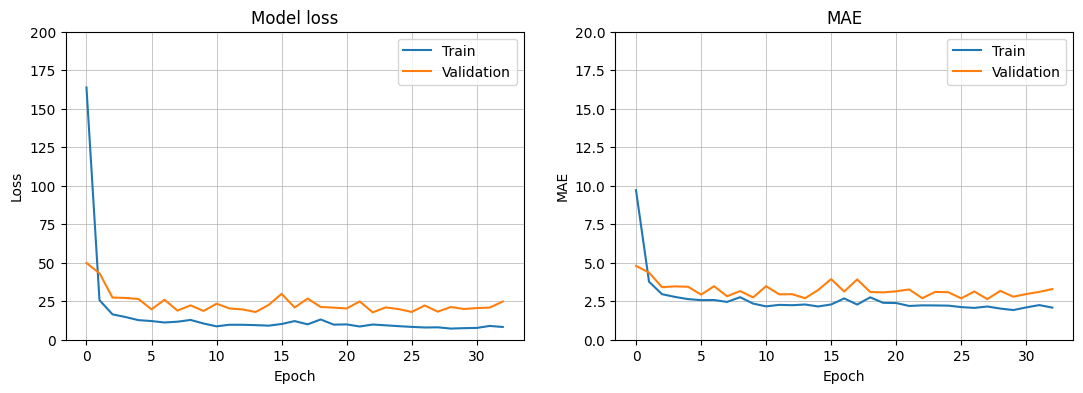

CPU times: user 4.56 s, sys: 1.25 s, total: 5.82 s
Wall time: 5.06 s


In [ ]:
%%time

# 1. Instantiating the Adam optimizer with a learning rate alpha = 0.1
adam = Adam(learning_rate = 0.1)

# 2. Initializing the model
model = initialize_model()

# 3. Compiling the model with the custom Adam optimizer
model = compile_model(model, adam)

# 4. Training the neural net
es = EarlyStopping(patience = 10)
history = model.fit(
    X_train_scaled,
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size=16, 
    epochs = 1_000,
    callbacks = [es],
    verbose = 0
)

# 5. Plot the history and evaluate the model
res = model.evaluate(X_test_scaled, y_test)[1]
res
print(f'Mean absolute error with a learning rate of 0.1: {res:.4f}')
plot_loss_mae(history)

### Playing with Learning Rates

Now, reproduce the same plots and results but for different Learning Rates.



2023-02-17 11:36:50.686781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:36:50.997510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 16.9573 - mae: 2.9214
MAE with a learning rate of 0.0001 --> 2.9214


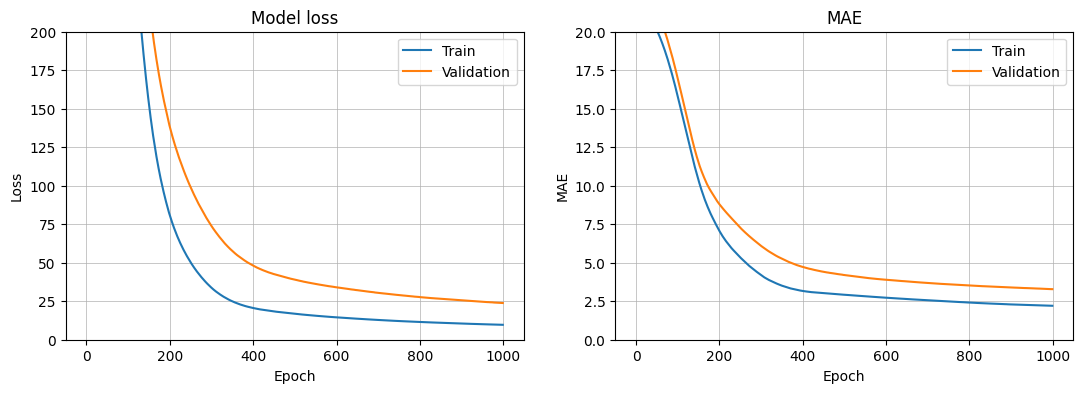

2023-02-17 11:39:06.877354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:39:07.214848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 20.8162 - mae: 2.9443
MAE with a learning rate of 0.001 --> 2.9443


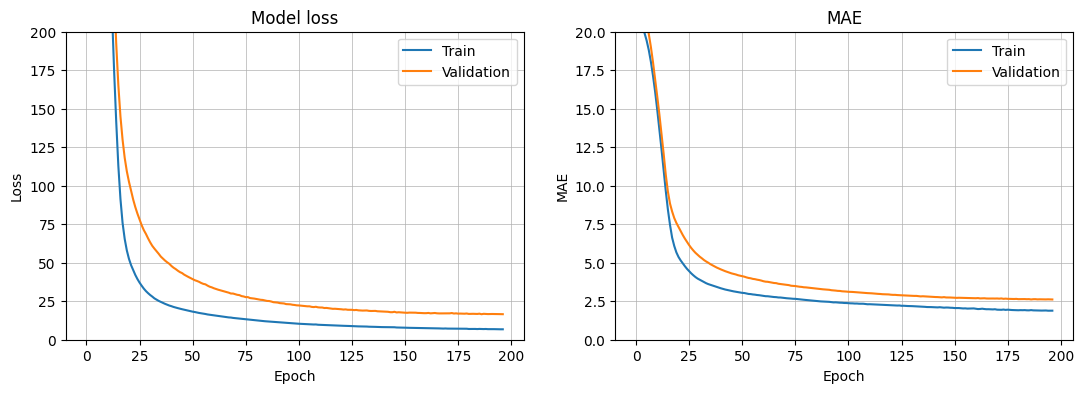

2023-02-17 11:39:36.543991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:39:36.967956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 16.5910 - mae: 2.7565
MAE with a learning rate of 0.01 --> 2.7565


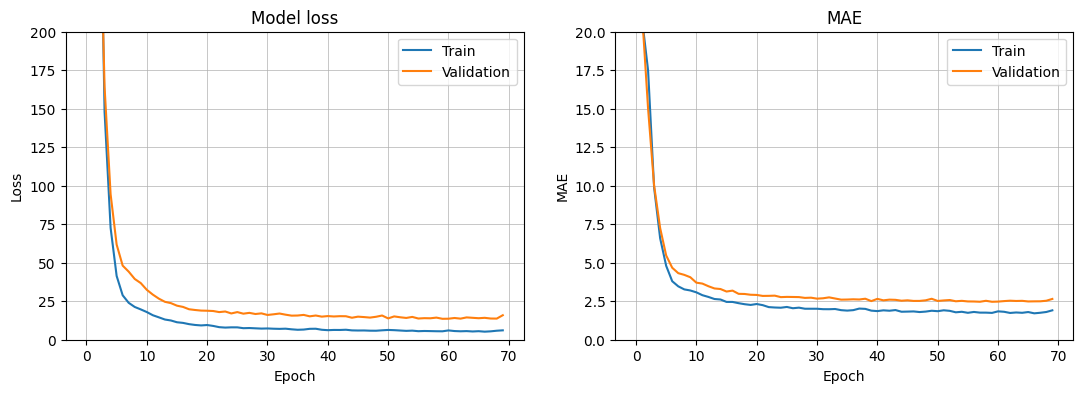

2023-02-17 11:39:46.218896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:39:46.521097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 14ms/step - loss: 17.8308 - mae: 2.6390
MAE with a learning rate of 0.1 --> 2.6390


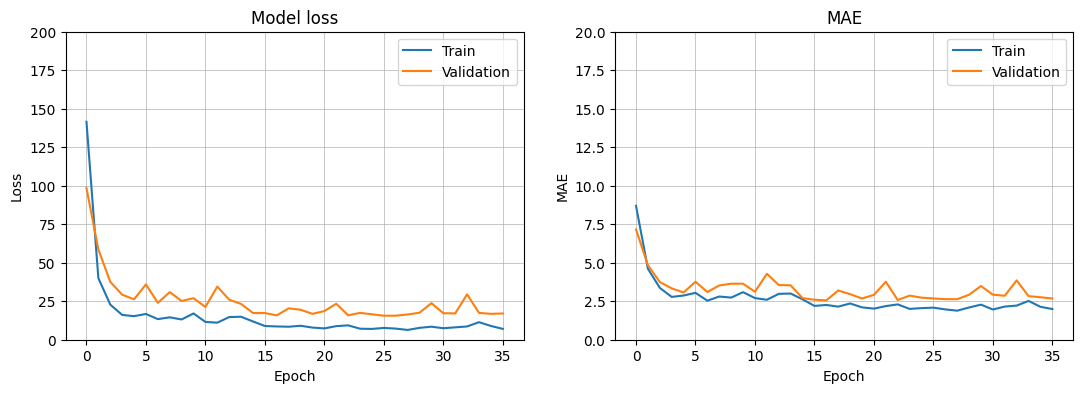

2023-02-17 11:39:51.181561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:39:51.491194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 84.9568 - mae: 6.5188
MAE with a learning rate of 1 --> 6.5188


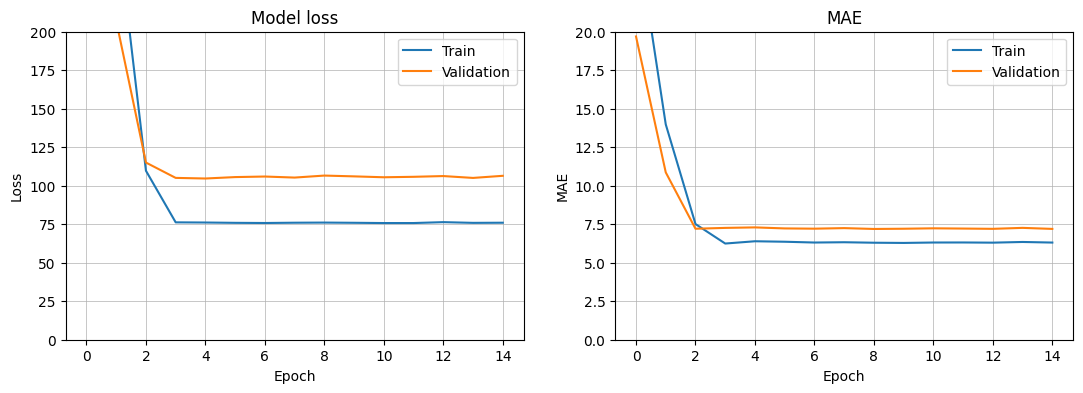

2023-02-17 11:39:53.724789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:39:54.042077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 84.5792 - mae: 6.5137
MAE with a learning rate of 2 --> 6.5137


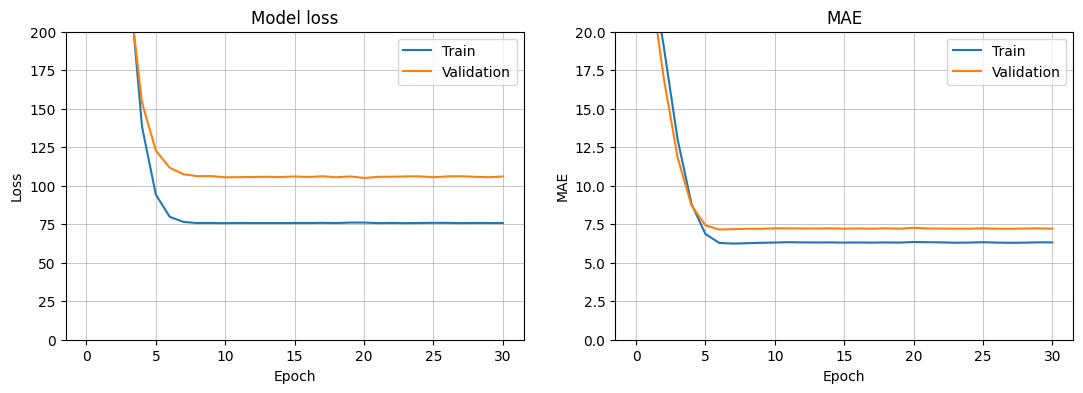

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:

    # 1. Instantiating the Adam optimizer with a specific learning_rate
    adam = Adam(learning_rate = learning_rate)

    # 2. Initializing the model
    model = initialize_model()

    # 3. Compiling the model with the custom Adam optimizer
    model = compile_model(model, adam)

    # 4. Training the neural net
    es = EarlyStopping(patience = 10)
    history = model.fit(
        X_train_scaled,
        y_train, 
        validation_split = 0.3,
        shuffle = True,
        batch_size=16, 
        epochs = 1_000,
        callbacks = [es],
        verbose = 0
    )

    # 5. Plot the history and evaluate the model
    res = model.evaluate(X_test_scaled, y_test)[1]
    results.append(res)

    print(f'MAE with a learning rate of {learning_rate} --> {res:.4f}')
    plot_loss_mae(history)


## (3) The Loss

- The **Loss Functions** are computed **during the training procedure**
    - For regression tasks, the classic Loss Functions are **(Root) Mean Squared Error** ((R)MSE), **Mean Absolute Error** (MAE), and **Mean Squared Logarithmic Error** (MSLE, as seen in the Kaggle challenge)
    - For classification tasks, the classic Loss Functions are **Binary Crossentropy** (also known as LogLoss), **Categorical Crossentropy**, Hinge Loss, etc.
- The **metrics** are computed to evaluate your models, **after training them**!
    - For regression tasks, common metrics are MSE, MAE, RMSE, Coefficient of Determination (R2), etc.
    - For classification tasks, common metrics are Accuracy, Recall, Precision, and F1-Score
-  Notice that some metrics can also be used as Loss Functions, as long as they are differentiable! (e.g. the **MSE**)



### Optimizing a Model with a certain Loss Function

- Run the same NN, once with `mae` as the loss, and once with `mse`
- In both cases, compare `mae_train`, `mae_val`, `mse_train`, `mse_val`

In [ ]:
### First, optimizing the Mean Absolute error

model = initialize_model()
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mse'])

es = EarlyStopping(patience = 10)
history = model.fit(
    X_train_scaled,
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size=16, 
    epochs = 1_000,
    callbacks = [es],
    verbose = 0
)

res = model.evaluate(X_test_scaled, y_test)

2023-02-17 11:39:58.426596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:39:58.727746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 2.7795 - mse: 16.0073


In [ ]:
print(f"MAE_train : {min(history.history['loss']):.4f} - MSE_train : {min(history.history['mse']):.4f}")
print(f"MAE_val : {min(history.history['val_loss']):.4f} - MSE_val : {min(history.history['val_mse']):.4f}")
print(f"MAE_test : {res[0]:.4f} - MSE_val : {res[1]:.4f}")

MAE_train : 1.8190 - MSE_train : 9.7450
MAE_val : 2.7789 - MSE_val : 29.9084
MAE_test : 2.7795 - MSE_val : 16.0073


In [ ]:
### Second, optimizing the Mean Squared Error
model = initialize_model()
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

es = EarlyStopping(patience = 10)
history = model.fit(
    X_train_scaled,
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size=16, 
    epochs = 1_000,
    callbacks = [es],
    verbose = 0
)

res = model.evaluate(X_test_scaled, y_test)

2023-02-17 11:40:46.504320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:40:46.887687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 13ms/step - loss: 19.4510 - mae: 2.9437


In [ ]:
res = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"MAE_train : {min(history.history['mae']):.4f} - MSE_train : {min(history.history['loss']):.4f}")
print(f"MAE_val : {min(history.history['val_mae']):.4f} - MSE_val : {min(history.history['val_loss']):.4f}")
print(f"MAE_test : {res[1]:.4f} - MSE_val : {res[0]:.4f}")

MAE_train : 1.6299 - MSE_train : 4.6028
MAE_val : 2.6461 - MSE_val : 15.5040
MAE_test : 2.9437 - MSE_val : 19.4510


## (4)  Saving and Loading a Trained Neural Network

 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new data point. Would you give this person your notebook for them to run it and then predict the new data point? Hell no, we have a much better solution:
-  Save the weights of the optimized Neural Network
-  Your friend/colleague/teammate/classmate can use them to predict a new data point

### Training a Good Model

- Try to reach an MAE on the testing set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - Remember: we are predicting house prices, so a mistake of less than 5.000 USD is already good in the real estate industry)

- Whether you managed to reach it or not, move on to the "Saving a Model" section after a few attempts.

2023-02-17 11:42:11.925016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 11:42:12.600516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


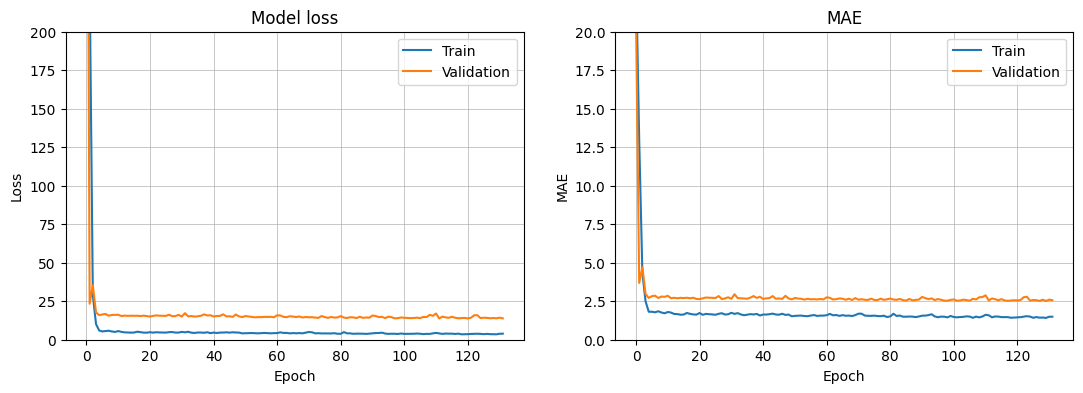

4/4 [==============================] - 0s 19ms/step - loss: 18.2350 - mae: 2.9187


2.918689489364624

In [ ]:
####################################
#                      1. Initializing the model                           #
####################################

model.add(layers.Dense(10, activation='relu', input_dim = X_train.shape[-1]))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

####################################
#                       2. Compiling the model                         #
####################################

# ------------------------- #
#     2.1. The Learning Rate      #
# ------------------------- #

# Starting with the initial learning rate
initial_learning_rate = 0.01

# We can decrease the Learning Rate progressively as the network
# converges; more details on that in the optional section! Students
# are not expected to implement the Exponential Decay here unless 
# they are already familiar with it, but I doubt it!

lr_schedule = ExponentialDecay(
    initial_learning_rate, 
    decay_steps = 2000, 
    decay_rate = 0.5
)

adam = Adam(learning_rate = lr_schedule)

# ------------------------------------------ #
#  2.2. Compiling with the customized Adam   #
# ------------------------------------------ #

model = compile_model(model, adam)

####################################
#                             3. Fit the model                                 #
####################################

es = EarlyStopping(patience = 20)

history = model.fit(
    X_train_scaled, 
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size=16, 
    epochs = 1000,
    callbacks = [es], 
    verbose = 0
)

####################################
#                4. Analyzing the loss over time                  #
####################################

plot_loss_mae(history)

####################################
#                     5. Evaluating the results                         #
####################################

mae_test = model.evaluate(X_test_scaled, y_test)[1]
mae_test

### Saving a Model



In [ ]:
models.save_model(model, 'my_beautiful_model')

INFO:tensorflow:Assets written to: my_beautiful_model/assets


In [ ]:
!ls

Finetune-and-save-your-neural-network.ipynb
Makefile
README.md
autotest.sh
my_beautiful_model
tests


In [ ]:
!ls my_beautiful_model

assets            keras_metadata.pb saved_model.pb    variables


### Loading a Model


- Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called `loaded_model`
- Evaluate it on the testing data to check that it gives the same result as before

In [ ]:
loaded_model = models.load_model('my_beautiful_model')
loaded_model

In [ ]:
loaded_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                140       
                                                                 
 dense_40 (Dense)            (None, 7)                 77        
                                                                 
 dense_41 (Dense)            (None, 1)                 8         
                                                                 
 dense_42 (Dense)            (None, 10)                20        
                                                                 
 dense_43 (Dense)            (None, 7)                 77        
                                                                 
 dense_44 (Dense)            (None, 1)                 8         
                                                                 
Total params: 330
Trainable params: 330
Non-trainable

In [ ]:
res_from_loaded_model = loaded_model.evaluate(X_test_scaled, y_test, verbose = 0)[1]
res_from_loaded_model

2023-02-17 11:42:51.012404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2.918689489364624

In [ ]:
res_from_loaded_model == mae_test

True